In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import argparse
import json
import pprint
import requests
import sys
import urllib
from urllib.error import HTTPError
from urllib.parse import quote
from urllib.parse import urlencode
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('preprocessed_df4.csv')

In [3]:
df.head()

,District_Name,UnitName,FIRNo,Year,Month,VictimName,age,Profession,Sex,PresentAddress,PresentCity,PresentState,PermanentCity,PermanentState,Nationality_Name,PersonType,InjuryType,Crime_No,Arr_ID,Victim_ID
0,Bagalkot,Amengad PS,0005/2016,2016,1,BASxxxxxHMI,60.0,Housewife,2.0,"AMBLIKOPPA,TQ-HUNGUND",Bagalkot,Karnataka,Bagalkot,Karnataka,India,Deceased,2.0,10470124520160005,2016000019,2016000007
1,Bagalkot,Amengad PS,0006/2016,2016,1,IRSxxxxxWAR,40.0,Driver,1.0,"BELAGAVI,TQ-BELAGAVI",Bagalkot,Karnataka,Bagalkot,Karnataka,India,Injured,2.0,10470124520160006,2016000021,2016000008
2,Bagalkot,Amengad PS,0011/2016,2016,1,GANxxxxxRAD,20.0,Labourer,1.0,"HIREBADAWADAGI,TQ-HUNAGUND",Bagalkot,Karnataka,Bagalkot,Karnataka,India,Injured,2.0,10470124520160011,2016000044,2016000010
3,Bagalkot,Amengad PS,0011/2016,2016,1,BASxxxxxAMI,18.0,Farmer,1.0,"HIREBADAWADAGI,TQ-HUNAGUND",Bagalkot,Karnataka,Bagalkot,Karnataka,India,Injured,2.0,10470124520160011,2016000043,2016000009
4,Bagalkot,Amengad PS,0041/2016,2016,2,SHAxxxxxLAD,34.0,Farmer,1.0,"SULEBAVI,TQ-HUNAGUND",Bagalkot,Karnataka,Bagalkot,Karnataka,India,Deceased,2.0,10470124520160041,2016000238,2016000018


In [4]:
(df.dtypes)

District_Name        object
UnitName             object
FIRNo                object
Year                  int64
Month                 int64
VictimName           object
age                 float64
Profession           object
Sex                 float64
PresentAddress       object
PresentCity          object
PresentState         object
PermanentCity        object
PermanentState       object
Nationality_Name     object
PersonType           object
InjuryType          float64
Crime_No              int64
Arr_ID                int64
Victim_ID             int64
dtype: object

In [5]:
for col in df.columns:
    print(f'Column: {col}')
    print(df[col].unique())

# Check for missing values
print(df.isnull().sum())

Column: District_Name
['Bagalkot' 'Ballari' 'Belagavi City' 'Belagavi Dist' 'Bengaluru City'
 'Bengaluru Dist' 'Bidar' 'Chamarajanagar' 'Chickballapura'
 'Chikkamagaluru' 'Chitradurga' 'CID' 'Dakshina Kannada' 'Davanagere'
 'Dharwad' 'Gadag' 'Hassan' 'Haveri' 'Hubballi Dharwad City'
 'ISD Bengaluru' 'K.G.F' 'Kalaburagi' 'Kalaburagi City'
 'Karnataka Railways' 'Kodagu' 'Kolar' 'Koppal' 'Mandya' 'Mangaluru City'
 'Mysuru City' 'Mysuru Dist' 'Raichur' 'Ramanagara' 'Shivamogga'
 'Tumakuru' 'Udupi' 'Uttara Kannada' 'Vijayanagara' 'Vijayapur' 'Yadgir']
Column: UnitName
['Amengad PS' 'Badami PS' 'Bagalkot CEN Crime PS' ... 'Yadgiri Town PS'
 'Yadgiri Traffic PS' 'Yadgiri Women PS']
Column: FIRNo
['0005/2016' '0006/2016' '0011/2016' ... '0857/2018' '0858/2018'
 '0861/2018']
Column: Year
[2016 2017 2018 2019 2020 2021 2022 2023 2024]
Column: Month
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Column: VictimName
['BASxxxxxHMI' 'IRSxxxxxWAR' 'GANxxxxxRAD' ... 'KHUxxxxxEEL' 'SMTxxxxxDOR'
 'Smtxxxxxpam']
C

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [7]:
cat_cols = ['District_Name', 'UnitName', 'FIRNo', 'VictimName', 'Profession', 'PresentAddress', 
            'PresentCity', 'PresentState', 'PermanentCity', 'PermanentState', 'Nationality_Name', 
            'PersonType']

In [8]:
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [9]:
num_cols = ['age', 'Sex', 'InjuryType']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [10]:
missing_values = df.isnull().sum()
print("Remaining missing values:\n", missing_values[missing_values > 0])

Remaining missing values:
 Series([], dtype: int64)


In [11]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 1


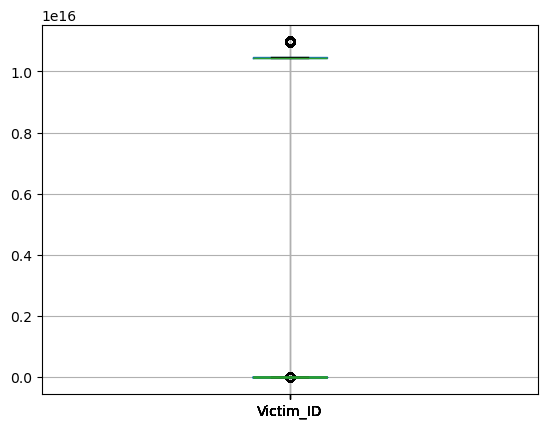

In [12]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    # Use box plot or other methods to identify outliers
    # For example, using box plot
    df.boxplot(column=col)


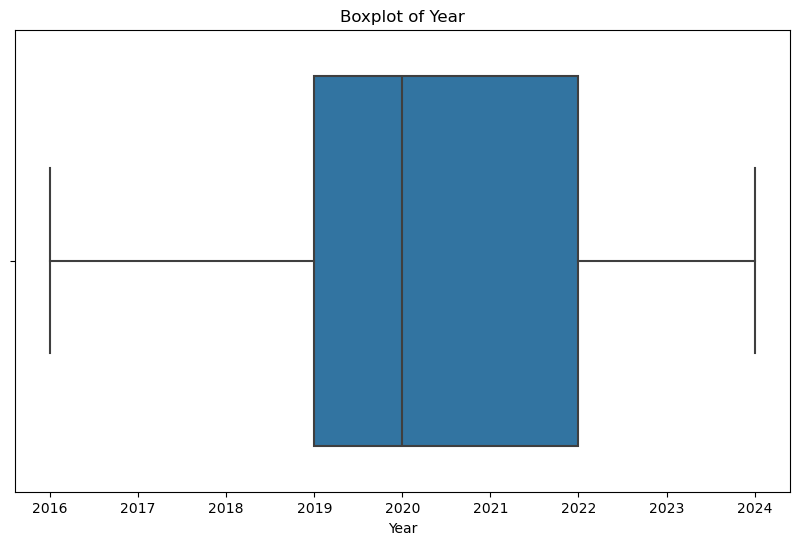

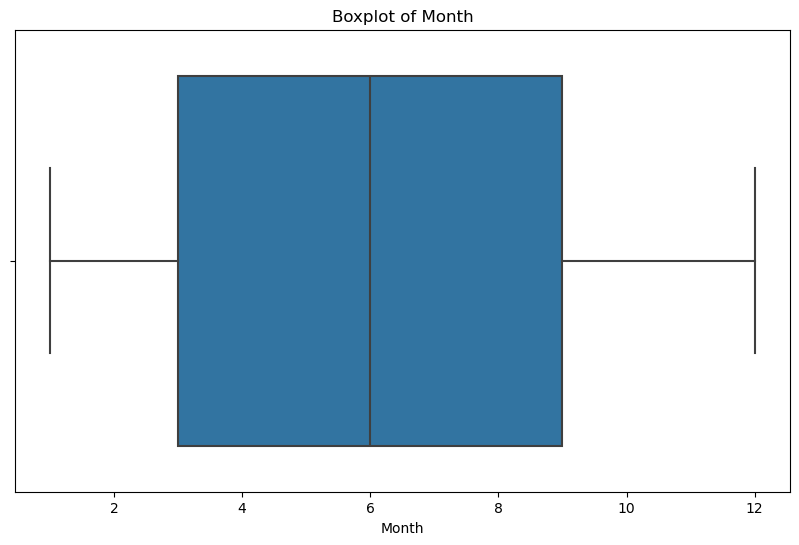

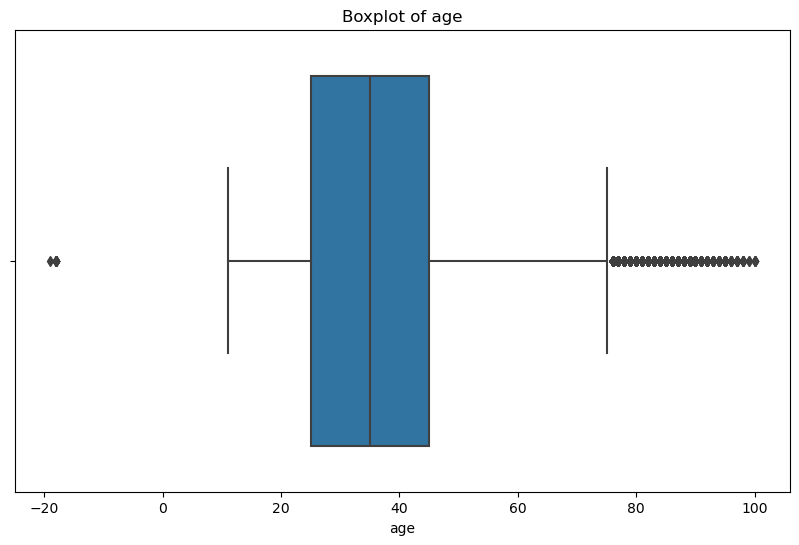

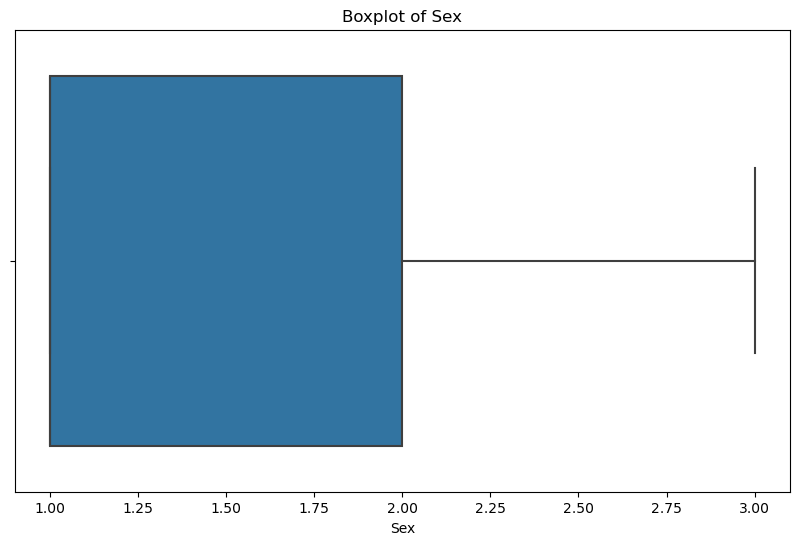

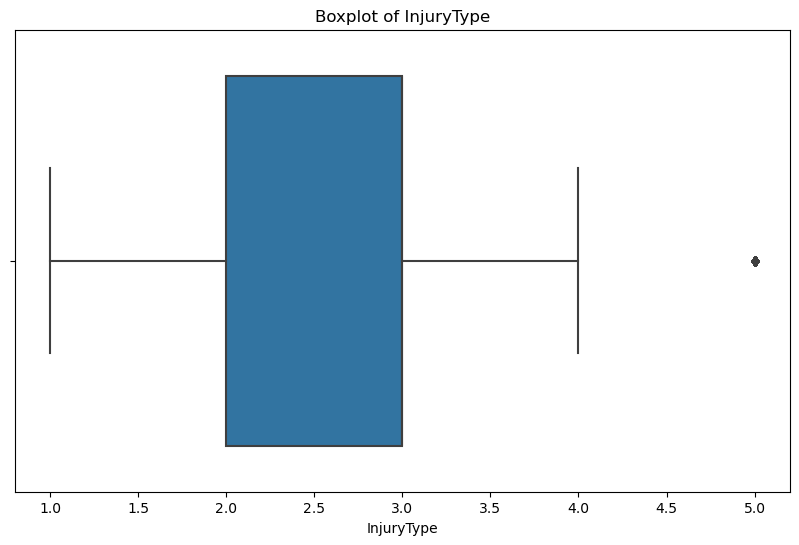

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Year', 'Month', 'age', 'Sex', 'InjuryType']
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [14]:
from scipy import stats

z_scores = stats.zscore(df[numerical_cols])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
print("Rows with outliers:", df[outliers])


Rows with outliers: Empty DataFrame
Columns: [District_Name, UnitName, FIRNo, Year, Month, VictimName, age, Profession, Sex, PresentAddress, PresentCity, PresentState, PermanentCity, PermanentState, Nationality_Name, PersonType, InjuryType, Crime_No, Arr_ID, Victim_ID]
Index: []


In [15]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print("Rows with outliers:", df[outliers])


Rows with outliers:          District_Name  UnitName  FIRNo  Year  Month  VictimName   age  \
294                  0        25   1694  2018     12       68184  80.0   
401                  0        25    660  2019     10      114598  90.0   
686                  0        25   1238  2021     11       34366  83.0   
699                  0        25   1373  2021     12        1782  82.0   
1389                 0        57   2018  2018     10      199184  76.0   
...                ...       ...    ...   ...    ...         ...   ...   
1254384             39      1024    304  2023     10      257101  23.0   
1254389             39      1024    349  2023     11      256681  26.0   
1254392             39      1024    376  2023     11      257521  31.0   
1254397             39      1024     35  2024      2      257135  29.0   
1254398             39      1024     44  2024      2      263198  29.0   

         Profession  Sex  PresentAddress  PresentCity  PresentState  \
294              66 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [17]:
columns_with_outliers = ['age']

In [18]:
for col in columns_with_outliers:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np


In [20]:
import pandas as pd

# Read a small sample of your dataset to analyze memory usage of each column
# Replace 'your_dataset.csv' with the path to your dataset
df_sample = pd.read_csv('preprocessed_df4.csv', nrows=100000)

# Function to reduce memory usage of DataFrame
def reduce_mem_usage(df):
    """Reduce memory usage of a DataFrame by converting data types."""
    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage of dataframe: {end_mem:.2f} MB ({100 * (start_mem - end_mem) / start_mem:.1f}% reduction)')
    return df

# Apply reduce_mem_usage to your full dataset
df_optimized = reduce_mem_usage(df)

# Use df_optimized for further analysis and modeling


Memory usage of dataframe: 66.50 MB (53.3% reduction)


numerical_cols = df.select_dtypes(include=['float64']).columns
df[numerical_cols] = df[numerical_cols].astype('float32')


categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].astype('category')

sample_frac = 0.01  # Adjust the fraction as needed
df_sampled = df.sample(frac=sample_frac, random_state=42)


X = df_sampled.drop('Crime_No', axis=1)  # Assuming 'Crime_No' is your target variable
y = df_sampled['Crime_No']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

In [21]:
from sklearn.preprocessing import OneHotEncoder



In [22]:
pip install category-encoders

Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [24]:
categorical_cols = df_optimized.select_dtypes(include=['object']).columns

In [25]:
from category_encoders import TargetEncoder


In [26]:
encoder = TargetEncoder()
df_target_encoded = encoder.fit_transform(df_optimized[categorical_cols], df_optimized['Crime_No'])

In [27]:
df_optimized.index = df_optimized.index.astype('int32')

In [28]:
df_optimized[categorical_cols] = df_optimized[categorical_cols].astype('category')

In [33]:
from sklearn.model_selection import train_test_split

# Specify the fraction of the dataset to use for training
train_fraction = 0.8

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_optimized, df_optimized['Crime_No'], train_size=train_fraction, random_state=42)




In [34]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [ ]:
rf_classifier.fit(X_train, y_train)